<a href="https://colab.research.google.com/github/UniqueCODER/AlgorithmsPython/blob/master/depression_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
worksheet = gc.open('depression_dataset1').sheet1

rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

In [ ]:
df[1] = df[1].str.strip('{}').str.replace('de_',"")

df


,0,1,2,3,4,5
0,35db89be8c66053330fd5eb1cf,high,24,"{'d_1': 2, 'd_2': 3, 'd_3': 1, 'd_4': 3, 'd_5'...",1639075476,12
1,4d9114df82d60da11706c9b28d,serious,16,"{'d_1': 2, 'd_2': 2, 'd_3': 1, 'd_4': 3, 'd_5'...",1639076583,29
2,8c033ba10bf480a2bb72597fe9,high,20,"{'d_1': 1, 'd_2': 2, 'd_3': 3, 'd_4': 3, 'd_5'...",1639076859,22
3,8a8b3a5b559ff2f49463e03429,high,22,"{'d_1': 2, 'd_2': 3, 'd_3': 2, 'd_4': 3, 'd_5'...",1639077081,12
4,d8c3248e9c0e2677c42af14337,high,20,"{'d_1': 1, 'd_2': 3, 'd_3': 3, 'd_4': 2, 'd_5'...",1639077566,16
...,...,...,...,...,...,...
1353,cf7eac02ddbdc62647b85a0d37,medium,13,"{'d_1': 3, 'd_2': 1, 'd_3': 1, 'd_4': 0, 'd_5'...",1641264328,41
1354,9a0eae7f5ab1b19667f845585c,high,23,"{'d_1': 2, 'd_2': 3, 'd_3': 2, 'd_4': 2, 'd_5'...",1641265419,28
1355,83a417cd6716cf9f3740bbae14,high,27,"{'d_1': 3, 'd_2': 3, 'd_3': 3, 'd_4': 3, 'd_5'...",1641268723,24
1356,6640b1ce836350add64660a8fb,medium,13,"{'d_1': 2, 'd_2': 1, 'd_3': 1, 'd_4': 1, 'd_5'...",1641271244,11


In [ ]:
df[3] = df[3].str.strip('{}').str.replace(':',"")

In [ ]:
df[3] =df[3].str.replace(r'\'d_[0-9]\' ','',regex=True)
df

,0,1,2,3,4,5
0,35db89be8c66053330fd5eb1cf,high,24,"2, 3, 1, 3, 3, 3, 3, 3, 3",1639075476,12
1,4d9114df82d60da11706c9b28d,serious,16,"2, 2, 1, 3, 2, 1, 2, 3, 0",1639076583,29
2,8c033ba10bf480a2bb72597fe9,high,20,"1, 2, 3, 3, 3, 3, 2, 1, 2",1639076859,22
3,8a8b3a5b559ff2f49463e03429,high,22,"2, 3, 2, 3, 3, 3, 2, 1, 3",1639077081,12
4,d8c3248e9c0e2677c42af14337,high,20,"1, 3, 3, 2, 2, 3, 2, 2, 2",1639077566,16
...,...,...,...,...,...,...
1353,cf7eac02ddbdc62647b85a0d37,medium,13,"3, 1, 1, 0, 2, 3, 0, 3, 0",1641264328,41
1354,9a0eae7f5ab1b19667f845585c,high,23,"2, 3, 2, 2, 3, 3, 3, 2, 3",1641265419,28
1355,83a417cd6716cf9f3740bbae14,high,27,"3, 3, 3, 3, 3, 3, 3, 3, 3",1641268723,24
1356,6640b1ce836350add64660a8fb,medium,13,"2, 1, 1, 1, 1, 3, 2, 1, 1",1641271244,11


In [ ]:
df[3] = df[3].str.strip('{}').str.replace(':',"")

In [ ]:
df3 = df[3]
df3=  df3.str.split(',', expand=True)
df3

,0,1,2,3,4,5,6,7,8
0,2,3,1,3,3,3,3,3,3
1,2,2,1,3,2,1,2,3,0
2,1,2,3,3,3,3,2,1,2
3,2,3,2,3,3,3,2,1,3
4,1,3,3,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...
1353,3,1,1,0,2,3,0,3,0
1354,2,3,2,2,3,3,3,2,3
1355,3,3,3,3,3,3,3,3,3
1356,2,1,1,1,1,3,2,1,1


In [ ]:
for i in df3.columns:
  df3[i] = df3[i].astype(int)


In [ ]:
df2 = pd.concat([df,df3], axis=1)
df2

,0,1,2,3,4,5,0,1,2,3,4,5,6,7,8
0,35db89be8c66053330fd5eb1cf,high,24,"2, 3, 1, 3, 3, 3, 3, 3, 3",1639075476,12,2,3,1,3,3,3,3,3,3
1,4d9114df82d60da11706c9b28d,serious,16,"2, 2, 1, 3, 2, 1, 2, 3, 0",1639076583,29,2,2,1,3,2,1,2,3,0
2,8c033ba10bf480a2bb72597fe9,high,20,"1, 2, 3, 3, 3, 3, 2, 1, 2",1639076859,22,1,2,3,3,3,3,2,1,2
3,8a8b3a5b559ff2f49463e03429,high,22,"2, 3, 2, 3, 3, 3, 2, 1, 3",1639077081,12,2,3,2,3,3,3,2,1,3
4,d8c3248e9c0e2677c42af14337,high,20,"1, 3, 3, 2, 2, 3, 2, 2, 2",1639077566,16,1,3,3,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,cf7eac02ddbdc62647b85a0d37,medium,13,"3, 1, 1, 0, 2, 3, 0, 3, 0",1641264328,41,3,1,1,0,2,3,0,3,0
1354,9a0eae7f5ab1b19667f845585c,high,23,"2, 3, 2, 2, 3, 3, 3, 2, 3",1641265419,28,2,3,2,2,3,3,3,2,3
1355,83a417cd6716cf9f3740bbae14,high,27,"3, 3, 3, 3, 3, 3, 3, 3, 3",1641268723,24,3,3,3,3,3,3,3,3,3
1356,6640b1ce836350add64660a8fb,medium,13,"2, 1, 1, 1, 1, 3, 2, 1, 1",1641271244,11,2,1,1,1,1,3,2,1,1


In [ ]:
df2 = df2.set_axis(['ID', 'Status', 'score', 'quiz',  'Timestamp','Time', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'], axis=1, inplace=False)
df2

,ID,Status,score,quiz,Timestamp,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,35db89be8c66053330fd5eb1cf,high,24,"2, 3, 1, 3, 3, 3, 3, 3, 3",1639075476,12,2,3,1,3,3,3,3,3,3
1,4d9114df82d60da11706c9b28d,serious,16,"2, 2, 1, 3, 2, 1, 2, 3, 0",1639076583,29,2,2,1,3,2,1,2,3,0
2,8c033ba10bf480a2bb72597fe9,high,20,"1, 2, 3, 3, 3, 3, 2, 1, 2",1639076859,22,1,2,3,3,3,3,2,1,2
3,8a8b3a5b559ff2f49463e03429,high,22,"2, 3, 2, 3, 3, 3, 2, 1, 3",1639077081,12,2,3,2,3,3,3,2,1,3
4,d8c3248e9c0e2677c42af14337,high,20,"1, 3, 3, 2, 2, 3, 2, 2, 2",1639077566,16,1,3,3,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,cf7eac02ddbdc62647b85a0d37,medium,13,"3, 1, 1, 0, 2, 3, 0, 3, 0",1641264328,41,3,1,1,0,2,3,0,3,0
1354,9a0eae7f5ab1b19667f845585c,high,23,"2, 3, 2, 2, 3, 3, 3, 2, 3",1641265419,28,2,3,2,2,3,3,3,2,3
1355,83a417cd6716cf9f3740bbae14,high,27,"3, 3, 3, 3, 3, 3, 3, 3, 3",1641268723,24,3,3,3,3,3,3,3,3,3
1356,6640b1ce836350add64660a8fb,medium,13,"2, 1, 1, 1, 1, 3, 2, 1, 1",1641271244,11,2,1,1,1,1,3,2,1,1


In [ ]:
del df2['quiz']
df2

,ID,Status,score,Timestamp,Time,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,35db89be8c66053330fd5eb1cf,high,24,1639075476,12,2,3,1,3,3,3,3,3,3
1,4d9114df82d60da11706c9b28d,serious,16,1639076583,29,2,2,1,3,2,1,2,3,0
2,8c033ba10bf480a2bb72597fe9,high,20,1639076859,22,1,2,3,3,3,3,2,1,2
3,8a8b3a5b559ff2f49463e03429,high,22,1639077081,12,2,3,2,3,3,3,2,1,3
4,d8c3248e9c0e2677c42af14337,high,20,1639077566,16,1,3,3,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,cf7eac02ddbdc62647b85a0d37,medium,13,1641264328,41,3,1,1,0,2,3,0,3,0
1354,9a0eae7f5ab1b19667f845585c,high,23,1641265419,28,2,3,2,2,3,3,3,2,3
1355,83a417cd6716cf9f3740bbae14,high,27,1641268723,24,3,3,3,3,3,3,3,3,3
1356,6640b1ce836350add64660a8fb,medium,13,1641271244,11,2,1,1,1,1,3,2,1,1


colummns = [Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9]


In [ ]:
columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9']
df3 = df2[columns]
df3

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,2,3,1,3,3,3,3,3,3
1,2,2,1,3,2,1,2,3,0
2,1,2,3,3,3,3,2,1,2
3,2,3,2,3,3,3,2,1,3
4,1,3,3,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...
1353,3,1,1,0,2,3,0,3,0
1354,2,3,2,2,3,3,3,2,3
1355,3,3,3,3,3,3,3,3,3
1356,2,1,1,1,1,3,2,1,1


In [ ]:
counts = df3
counts

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,2,3,1,3,3,3,3,3,3
1,2,2,1,3,2,1,2,3,0
2,1,2,3,3,3,3,2,1,2
3,2,3,2,3,3,3,2,1,3
4,1,3,3,2,2,3,2,2,2
...,...,...,...,...,...,...,...,...,...
1353,3,1,1,0,2,3,0,3,0
1354,2,3,2,2,3,3,3,2,3
1355,3,3,3,3,3,3,3,3,3
1356,2,1,1,1,1,3,2,1,1


<function matplotlib.pyplot.show>

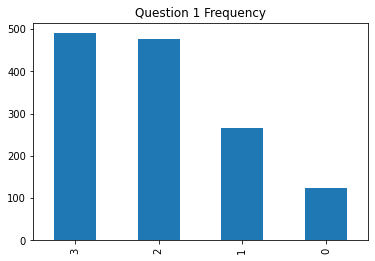

In [ ]:
count_q1 = counts['Q1'].value_counts().astype(int)
count_q1.plot(kind="bar")

plt.title("Question 1 Frequency")
plt.show

Text(0.5, 1.0, 'Question 2 Frequency')

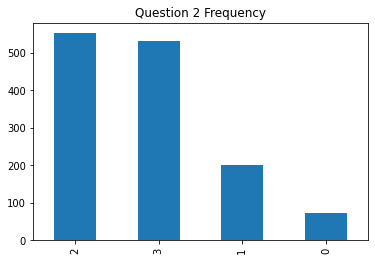

In [ ]:
count_q2 = counts['Q2'].value_counts().astype(int)
count_q2.plot(kind="bar")

plt.title("Question 2 Frequency")

Text(0.5, 1.0, 'Question 3 Frequency')

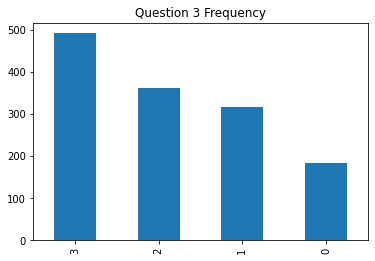

In [ ]:
count_q3 = counts['Q3'].value_counts().astype(int)
count_q3.plot(kind="bar")

plt.title("Question 3 Frequency")

Text(0.5, 1.0, 'Question 4 Frequency')

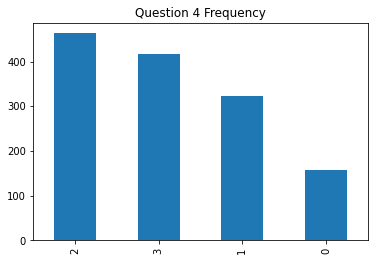

In [ ]:
count_q4 = counts['Q4'].value_counts().astype(int)
count_q4.plot(kind="bar")

plt.title("Question 4 Frequency")

Text(0.5, 1.0, 'Question 5 Frequency')

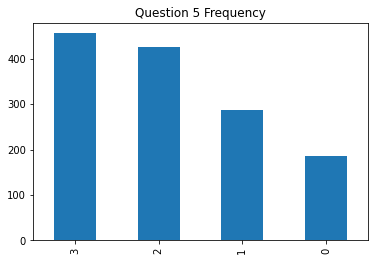

In [ ]:
count_q5 = counts['Q5'].value_counts().astype(int)
count_q5.plot(kind="bar")

plt.title("Question 5 Frequency")

Text(0.5, 1.0, 'Question 4 Frequency')

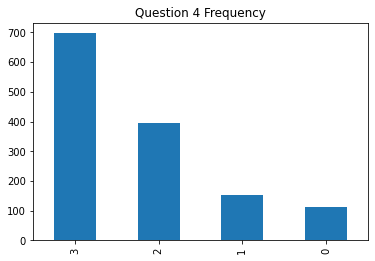

In [ ]:
count_q6 = counts['Q6'].value_counts().astype(int)
count_q6.plot(kind="bar")

plt.title("Question 4 Frequency")

Text(0.5, 1.0, 'Question 7 Frequency')

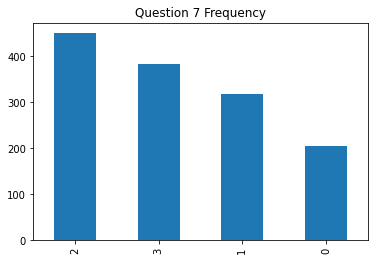

In [ ]:
count_q7 = counts['Q7'].value_counts().astype(int)
count_q7.plot(kind="bar")

plt.title("Question 7 Frequency")

Text(0.5, 1.0, 'Question 8 Frequency')

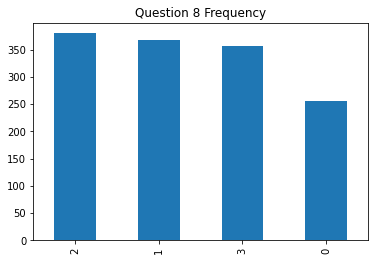

In [ ]:
count_q8 = counts['Q8'].value_counts().astype(int)
count_q8.plot(kind="bar")

plt.title("Question 8 Frequency")

Text(0.5, 1.0, 'Question 9 Frequency')

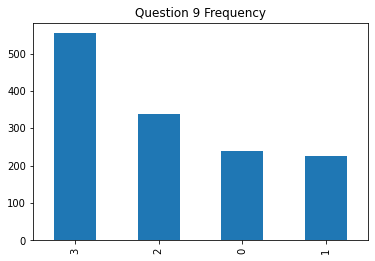

In [ ]:
count_q9 = counts['Q9'].value_counts().astype(int)
count_q9.plot(kind="bar")

plt.title("Question 9 Frequency")

Text(0.5, 1.0, 'Quizzes comparison Frequency')

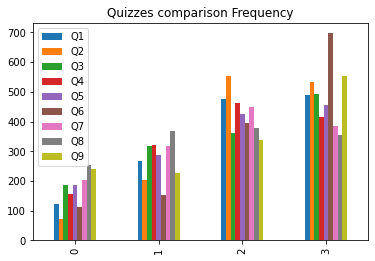

In [ ]:

count_quiz = pd.concat([count_q1, count_q2,count_q3,count_q4, count_q5,count_q6,count_q7, count_q8,count_q9], axis=1)
count_quiz.plot(kind="bar")

plt.title("Quizzes comparison Frequency")

In [ ]:
df4=df3.sum(axis = 0, skipna = True)
df4

Q1    2691
Q2    2902
Q3    2520
Q4    2496
Q5    2510
Q6    3033
Q7    2371
Q8    2195
Q9    2566
dtype: int64

Text(0.5, 1.0, 'Botnoi Survey')

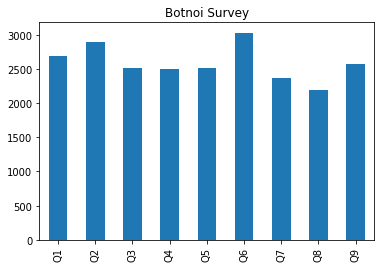

In [ ]:
df4.plot(kind="bar")
plt.title("Botnoi Survey")

In [ ]:
import datetime as dt
data_time = df2['Timestamp']
data_time = pd.to_datetime(data_time, unit='s')
data_time=  data_time.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
data_time = pd.DataFrame(data_time)
data_time.columns.rename("timestamp")
df2.columns

Index(['ID', 'Status', 'score', 'Timestamp', 'Time', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9'],
      dtype='object')

In [ ]:
df2.columns

Index(['ID', 'Status', 'score', 'Timestamp', 'Time', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9'],
      dtype='object')

In [ ]:
data_time.columns

Index(['Timestamp'], dtype='object')

In [ ]:
data_time['year'] = data_time['Timestamp'].dt.year
data_time['month'] = data_time['Timestamp'].dt.month
data_time['day'] = data_time['Timestamp'].dt.day
data_time['hour'] = data_time['Timestamp'].dt.hour
data_time['minute'] = data_time['Timestamp'].dt.minute
data_time['dayofweek'] = data_time['Timestamp'].dt.dayofweek
data_time

,Timestamp,year,month,day,hour,minute,dayofweek
0,2021-12-10 01:44:36+07:00,2021,12,10,1,44,4
1,2021-12-10 02:03:03+07:00,2021,12,10,2,3,4
2,2021-12-10 02:07:39+07:00,2021,12,10,2,7,4
3,2021-12-10 02:11:21+07:00,2021,12,10,2,11,4
4,2021-12-10 02:19:26+07:00,2021,12,10,2,19,4
...,...,...,...,...,...,...,...
1353,2022-01-04 09:45:28+07:00,2022,1,4,9,45,1
1354,2022-01-04 10:03:39+07:00,2022,1,4,10,3,1
1355,2022-01-04 10:58:43+07:00,2022,1,4,10,58,1
1356,2022-01-04 11:40:44+07:00,2022,1,4,11,40,1


In [ ]:
hour = pd.DataFrame(data_time.groupby('hour').size())
hour.columns=['hour']
hour

,hour
hour,
0,51
1,45
2,27
3,8
4,7
5,9
6,11
7,30
8,53


In [ ]:
day = pd.DataFrame(data_time.groupby('day').size())
print(day)


      0
day    
1    84
2    68
3    80
4    26
10   40
11   51
12   44
13   49
14   45
15   69
16   48
17   44
18   44
19   63
20   62
21   49
22   45
23   48
24   49
25   60
26   57
27   53
28   48
29   64
30   47
31   21


0    84
dtype: int64

             0    Days
dayofweek             
0          244  Monday
1          168       t
2          178       w
3          143      th
4          154       f
5          239     sat
6          232     sun


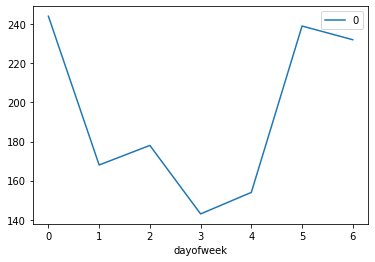

In [ ]:
dayofweek = pd.DataFrame(data_time.groupby('dayofweek').size())
days= ['Monday','t','w','th','f','sat','sun']
dayofweek['Days'] = days
print(dayofweek)
dayofweek.plot()
 

In [ ]:
status_time = pd.concat([df2['Status'], data_time['hour']], axis=1)
status_time

,Status,hour
0,high,1
1,serious,2
2,high,2
3,high,2
4,high,2
...,...,...
1353,medium,9
1354,high,10
1355,high,10
1356,medium,11


In [ ]:
stat = pd.DataFrame(status_time.groupby(['Status', 'hour']).size())
stat

0
Status  hour    
high    0     15
        1     21
        2     12
        3      5
        4      3
...           ..
serious 19    21
        20    24
        21    39
        22    34
        23    27

[108 rows x 1 columns]

In [ ]:
import seaborn as sns

In [ ]:
feat

In [ ]:
sns.heatmap(feat_1.corr(), cmap='coolware'.center=0)